In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv("raw_data.csv", sep=',' ,skiprows=1)
data.columns = ["time", "value", "2","3","4"]
data=data.drop(["2","3","4"], axis=1)
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
ts = data['value']




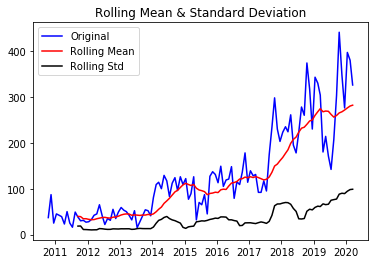

Results of Dickey-Fuller Test:
Test Statistic                   0.289888
p-value                          0.976876
#Lags Used                      13.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64


'\nmodel=ARIMA(ts_log, order=(2,1,0))\nresults_AR=model.fit(disp=-1)\nplt.subplot(221)\nplt.plot(diff)\nplt.plot(results_AR.fittedvalues,color=\'red\')\nplt.title("RSS: %0.4f" %(np.square(np.sum(np.subtract(results_AR.fittedvalues,diff)))))\nmodel=ARIMA(ts_log, order=(0,1,2))\nresults_MA=model.fit(disp=-1)\nplt.subplot(222)\nplt.plot(diff)\nplt.plot(results_MA.fittedvalues,color=\'red\')\nplt.title("RSS: %0.4f" %(np.square(np.sum(np.subtract(results_MA.fittedvalues,diff)))))\nmodel=ARIMA(ts_log, order=(2,1,1))\nresults_ARIMA=model.fit(disp=-1)\nplt.subplot(223)\nplt.plot(diff)\nplt.plot(results_ARIMA.fittedvalues,color=\'red\')\nplt.title("RSS: %0.4f" %(np.square(np.sum(np.subtract(results_ARIMA.fittedvalues,diff)))))\nplt.show()\npredictions_MA_diff=pd.Series(results_MA.fittedvalues, copy=True)\npredictions_MA_diff_cumsum=predictions_MA_diff.cumsum()\npredictions_MA_log=pd.Series(ts_log.iloc[0], index=ts_log.index)\npredictions_MA_log=predictions_MA_log.add(predictions_MA_diff_cumsum,

In [2]:
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    # Plot rolling statistics:
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    # Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
test_stationarity(ts)
"""
ts_log=np.log(ts)
ts_log_mean=ts_log.rolling(12).mean()
ts_log_wmean= ts_log.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
diff=np.subtract(ts_log, ts_log.shift())
diff.dropna(inplace=True)
test_stationarity(diff)

lag_acf=acf(diff,nlags=20)
lag_pacf = pacf(diff,nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)), linestyle='--', color='gray')
plt.title('Patial Autocorrelation Function')
plt.tight_layout()
plt.show()
"""
"""
p = q =d = range(0, 5)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(ts, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

p = q =d = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = SARIMAX(ts, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                  enforce_invertibility=False)

        results = mod.fit()
        pred = results.get_prediction(start=pd.to_datetime('2019-01-15'), dynamic=False)
        y_forecasted = pred.predicted_mean
        y_truth = ts['2019-01-15':]
        mse = ((y_forecasted - y_truth) ** 2).mean()
        print('ARIMA{}x{}12 '.format(param, param_seasonal))
        print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
        print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
"""

"""
model=ARIMA(ts_log, order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.subplot(221)
plt.plot(diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title("RSS: %0.4f" %(np.square(np.sum(np.subtract(results_AR.fittedvalues,diff)))))
model=ARIMA(ts_log, order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.subplot(222)
plt.plot(diff)
plt.plot(results_MA.fittedvalues,color='red')
plt.title("RSS: %0.4f" %(np.square(np.sum(np.subtract(results_MA.fittedvalues,diff)))))
model=ARIMA(ts_log, order=(2,1,1))
results_ARIMA=model.fit(disp=-1)
plt.subplot(223)
plt.plot(diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title("RSS: %0.4f" %(np.square(np.sum(np.subtract(results_ARIMA.fittedvalues,diff)))))
plt.show()
predictions_MA_diff=pd.Series(results_MA.fittedvalues, copy=True)
predictions_MA_diff_cumsum=predictions_MA_diff.cumsum()
predictions_MA_log=pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_MA_log=predictions_MA_log.add(predictions_MA_diff_cumsum,fill_value=0)
print(predictions_MA_log)

mod = ARIMA(ts,order=(0,1,2))
results = mod.fit()
print(results.summary().tables[1])

pred = results.get_prediction(start=pd.to_datetime('2020-04-15'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

"""





                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0130      0.602      0.022      0.983      -1.168       1.194
ar.L2          0.5278      0.404      1.305      0.192      -0.265       1.320
ma.L1          0.6344      0.649      0.978      0.328      -0.637       1.906
ar.S.L12      -1.3204      0.114    -11.622      0.000      -1.543      -1.098
ar.S.L24      -0.8047      0.133     -6.071      0.000      -1.064      -0.545
sigma2      1795.2462    310.843      5.775      0.000    1186.005    2404.488


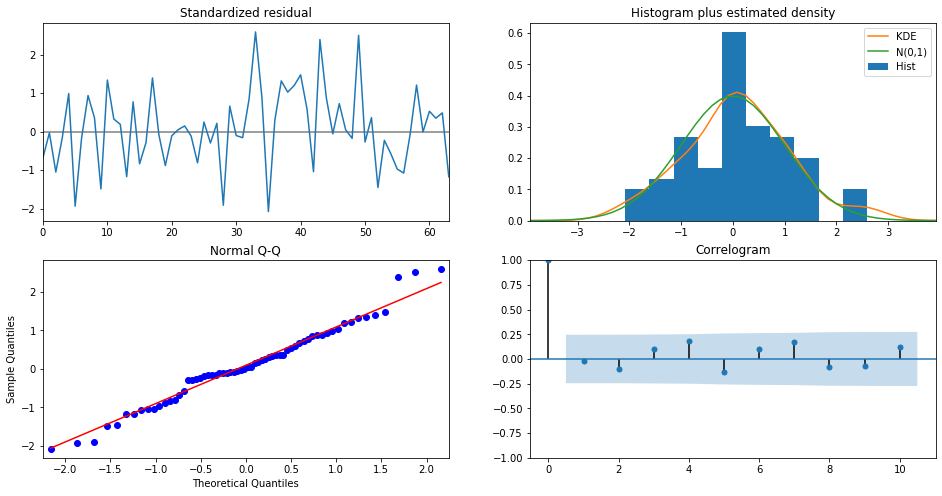

In [3]:
mod = SARIMAX(ts,order=(2, 0, 1),seasonal_order=(2, 2, 0, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 8))
plt.show()


time
2019-01-15    237.009961
2019-02-15    341.485569
2019-03-15    288.550954
2019-04-15    241.555020
2019-05-15    223.589257
2019-06-15    195.239161
2019-07-15    183.222972
2019-08-15    252.640818
2019-09-15    306.089880
2019-10-15    389.799027
2019-11-15    347.315958
2019-12-15    253.639049
2020-01-15    382.251803
2020-02-15    359.408001
2020-03-15    375.750045
dtype: float64
The Mean Squared Error of our forecasts is 1740.21
The Root Mean Squared Error of our forecasts is 41.72
2020-04-15    261.785241
2020-05-15    226.353146
2020-06-15    174.544942
2020-07-15    240.782439
2020-08-15    328.027934
2020-09-15    399.986235
2020-10-15    587.551830
2020-11-15    422.372486
2020-12-15    345.970883
2021-01-15    508.255193
2021-02-15    498.622220
2021-03-15    434.551066
dtype: float64


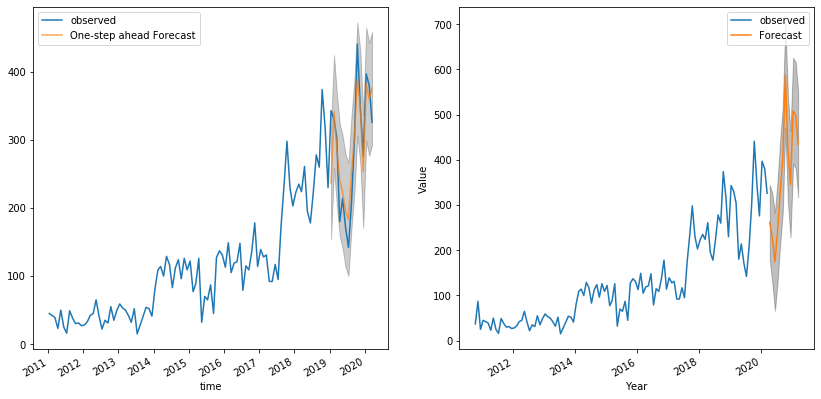

In [4]:
plt.subplot(121)
pred = results.get_prediction(start=pd.to_datetime('2019-01-15'), dynamic=False)
print(pred.predicted_mean)
pred_ci = pred.conf_int()
ax = ts['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.subplot(122)
y_forecasted = pred.predicted_mean
y_truth = ts['2019-01-15':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

fcast_index = pd.to_datetime(['2020-04-15', '2020-05-15', '2020-06-15', '2020-07-15', '2020-08-15', '2020-09-15', '2020-10-15', '2020-11-15', '2020-12-15', '2021-01-15', '2021-02-15', '2021-03-15'])
pred_uc = results.get_forecast(steps=12, index=fcast_index)
print(pred_uc.predicted_mean)
pred_ci = pred_uc.conf_int()
ax = ts.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Value')
plt.legend()
plt.show()